___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Pandas Built-in Data Visualization

In this lecture we will learn about pandas built-in capabilities for data visualization! It's built off of matplotlib, but it's baked into pandas for easier usage!

For more information on the following topics visit https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html<br>
For a nice graphic showing the anatomy of a figure with terminology, visit https://matplotlib.org/faq/usage_faq.html

Let's dive in!

## Imports

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline

<div class="alert alert-info"><strong>NOTE:</strong><tt><font color=black>&emsp;%matplotlib inline</font></tt> is specific to jupyter notebooks. It allows plots to appear inside the notebook.<br>Note that we are <em>not</em> importing matplotlib here, all of our plots are coming out of pandas.</div>

## The Data

There are some fake data csv files you can read in as dataframes:

In [3]:
df1 = pd.read_csv('df1.csv', index_col=0)
df2 = pd.read_csv('df2.csv')

# Plot Types

There are several plot types built into pandas; most of them are statistical by nature:

<pre>
df.plot.hist()     histogram
df.plot.bar()      bar chart
df.plot.barh()     horizontal bar chart
df.plot.line()     line chart
df.plot.area()     area chart
df.plot.scatter()  scatter plot
df.plot.box()      box plot
df.plot.kde()      kde plot
df.plot.hexbin()   hexagonal bin plot
df.plot.pie()      pie chart</pre>

You can also call specific plots by passing their name as an argument, as with `df.plot(kind='area')`.

Let's start going through them! First we'll look at the data:

In [3]:
df1.head()

,A,B,C,D
2000-01-01,1.339091,-0.163643,-0.646443,1.041233
2000-01-02,-0.774984,0.137034,-0.882716,-2.253382
2000-01-03,-0.921037,-0.482943,-0.417100,0.478638
2000-01-04,-1.738808,-0.072973,0.056517,0.015085
2000-01-05,-0.905980,1.778576,0.381918,0.291436


In [4]:
df2.head()

,a,b,c,d,e
0,0.039762,0.218517,0.103423,0.957904,x
1,0.937288,0.041567,0.899125,0.977680,y
2,0.780504,0.008948,0.557808,0.797510,x
3,0.672717,0.247870,0.264071,0.444358,z
4,0.053829,0.520124,0.552264,0.190008,y


___
## Histograms
This is one of the most commonly used plots. Histograms describe the distribution of continuous data by dividing the data into "bins" of equal width, and plotting the number of values that fall into each bin. <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.hist.html'>[reference]</a>

<Axes: ylabel='Frequency'>

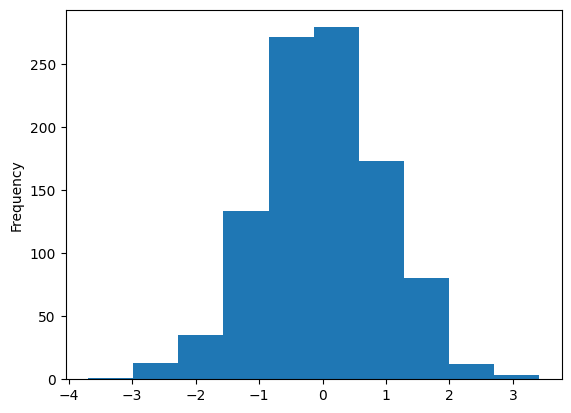

In [4]:
df1['A'].plot.hist()

<div class="alert alert-info"><strong>NOTE:</strong> To avoid seeing<tt><font color=black>&emsp;Out[5]: &lt;matplotlib.axes._subplots.AxesSubplot at 0x2640e47af60&gt;</font></tt><br>in jupyter you can add a semicolon to the end of the plot line.</div>

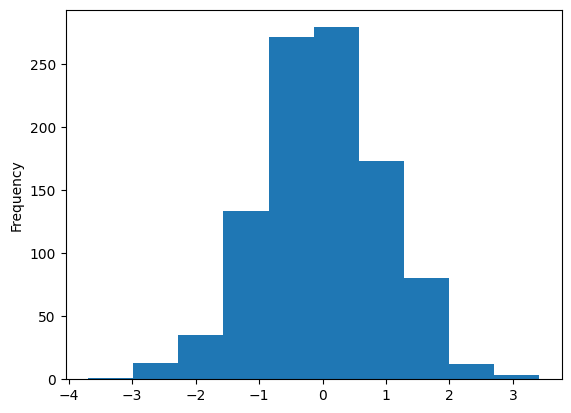

In [5]:
df1['A'].plot.hist();

We can add settings to do things like bring the x- and y-axis values to the edge of the graph, and insert lines between vertical bins:

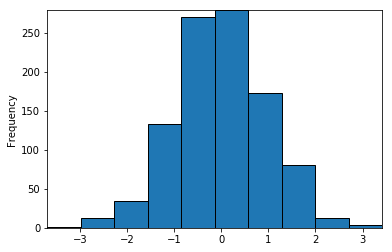

In [7]:
df1['A'].plot.hist(edgecolor='k').autoscale(enable=True, axis='both', tight=True)

You can use any [matplotlib color spec](https://matplotlib.org/api/colors_api.html) for **edgecolor**, such as `'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'`, or the string representation of a float value for shades of grey, such as `'0.5'`

For **autoscale** the axis can be set to `'x'`, `'y'` or `'both'`

We can also change the number of bins (the range of values over which frequencies are calculated) from the default value of 10:

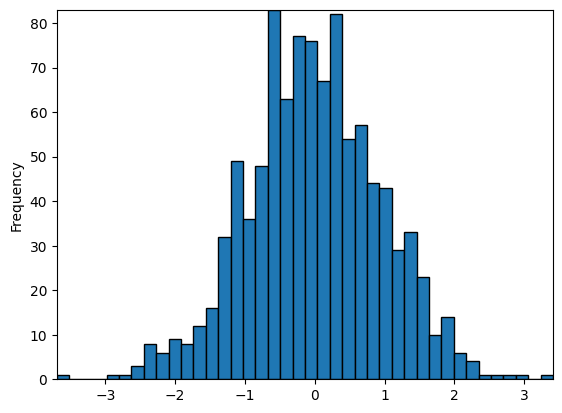

In [6]:
df1['A'].plot.hist(bins=40, edgecolor='k').autoscale(enable=True, axis='both', tight=True)

<div class="alert alert-info"><strong>NOTE:</strong> Histograms are also accessible with <tt><font color=black>df.hist()</font></tt>, but some changes are made to the default formatting (dropped y-axis label, addition of gridlines)</div>

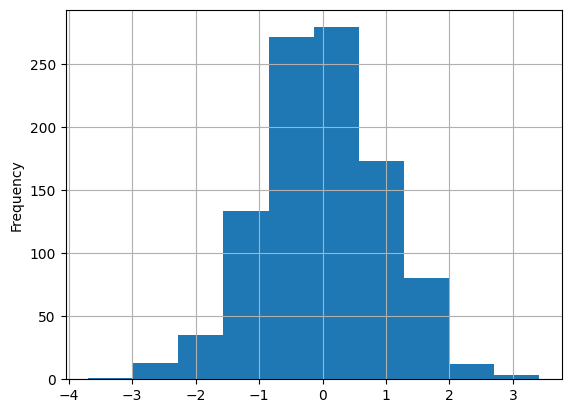

In [8]:
df1['A'].plot.hist(grid = True);

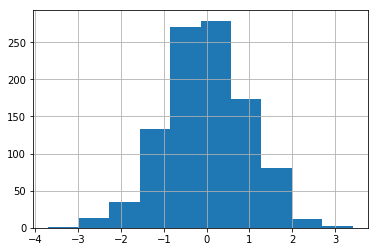

In [9]:
df1['A'].hist();

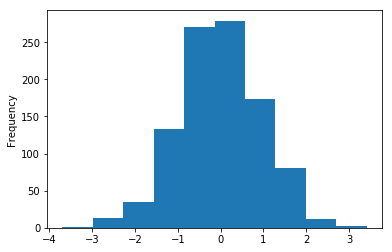

In [10]:
df1['A'].hist(grid=False).set_ylabel("Frequency");

For more on using <tt>df.hist()</tt> visit https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html

## Barplots
Barplots are similar to histograms, except that they deal with discrete data, and often reflect multiple variables. <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.bar.html'>[reference]</a>

In [9]:
df2

,a,b,c,d,e
0,0.039762,0.218517,0.103423,0.957904,x
1,0.937288,0.041567,0.899125,0.977680,y
2,0.780504,0.008948,0.557808,0.797510,x
3,0.672717,0.247870,0.264071,0.444358,z
4,0.053829,0.520124,0.552264,0.190008,y
5,0.286043,0.593465,0.907307,0.637898,x
6,0.430436,0.166230,0.469383,0.497701,z
7,0.312296,0.502823,0.806609,0.850519,z
8,0.187765,0.997075,0.895955,0.530390,x
9,0.908162,0.232726,0.414138,0.432007,y


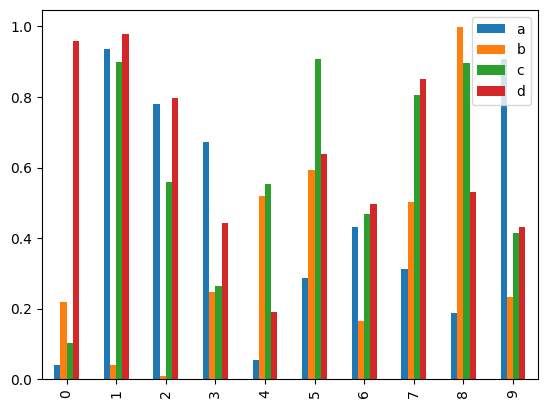

In [10]:
# index as category
# get value from columns
df2.plot.bar();

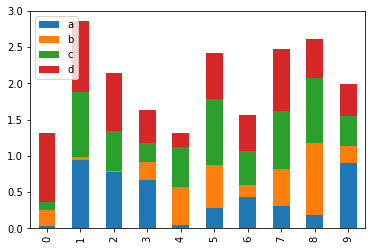

In [12]:
df2.plot.bar(stacked=True);

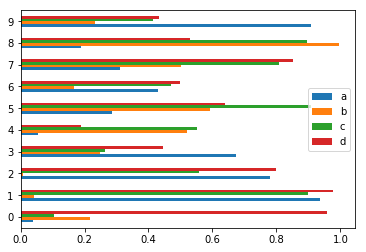

In [13]:
# USE .barh() TO DISPLAY A HORIZONTAL BAR PLOT
df2.plot.barh();

## Line Plots
Line plots are used to compare two or more variables. By default the x-axis values are taken from the index. <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.line.html'>[reference]</a>

Line plots happen to be the default pandas plot. They are accessible through <tt>df.plot()</tt> as well as <tt>df.plot.line()</tt>

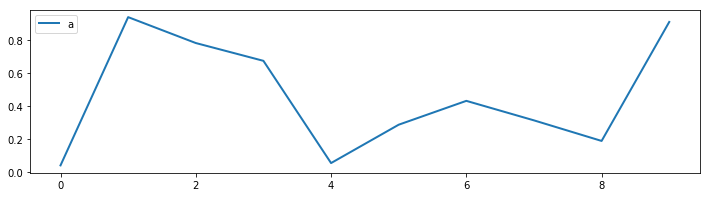

In [14]:
df2.plot.line(y='a',figsize=(12,3),lw=2);

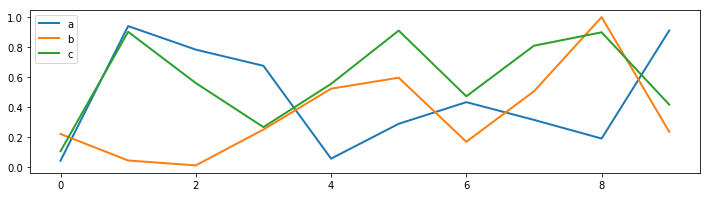

In [15]:
df2.plot.line(y=['a','b','c'],figsize=(12,3),lw=2);

## Area Plots
Area plots represent cumulatively stacked line plots where the space between lines is emphasized with colors. <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.area.html'>[reference]</a>

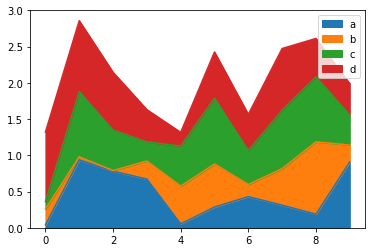

In [16]:
df2.plot.area();

It often helps to mute the colors by passing an <strong>alpha</strong> transparency value between 0 and 1.

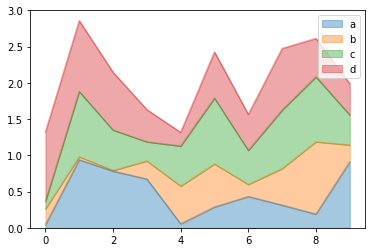

In [17]:
df2.plot.area(alpha=0.4);

To produce a blended area plot, pass a <strong>stacked=False</strong> argument:

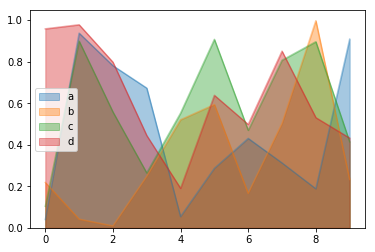

In [18]:
df2.plot.area(stacked=False, alpha=0.4);

## Scatter Plots
Scatter plots are a useful tool to quickly compare two variables, and to look for possible trends. <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.scatter.html'>[reference]</a>

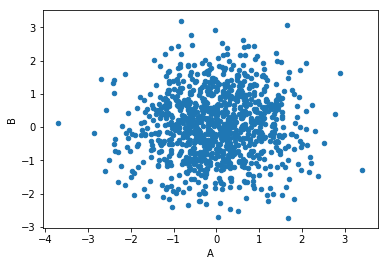

In [19]:
df1.plot.scatter(x='A',y='B');

### Scatter plots with colormaps
You can use <strong>c</strong> to color each marker based off another column value. Use `cmap` to indicate which colormap to use.<br>
For all the available colormaps, check out: http://matplotlib.org/users/colormaps.html

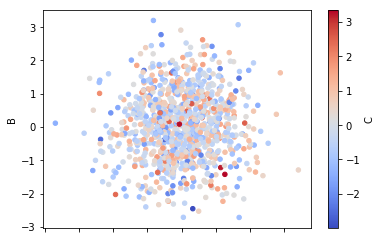

In [20]:
df1.plot.scatter(x='A',y='B',c='C',cmap='coolwarm');

<div class="alert alert-danger"><strong>NOTE:</strong> As of pandas 0.23.4 there is a <a href='https://github.com/pandas-dev/pandas/issues/10611'>known issue</a> where colormaps chop off the x-axis tics.<br>This is due to be fixed in an <a href='https://github.com/pandas-dev/pandas/pull/20446'>upcoming release</a>. For now, the following matplotlib code will work:</div>

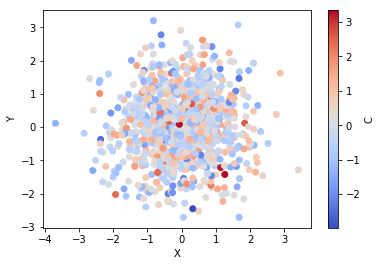

In [21]:
import matplotlib.pyplot as plt
plt.scatter(df1['A'],df1['B'],c=df1['C'],cmap='coolwarm')
plt.colorbar().set_label('C')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Scatter plots with sized markers
Alternatively you can use <strong>s</strong> to indicate marker size based off another column. The <strong>s</strong> parameter needs to be an array, not just the name of a column:

/Users/yingliu/Desktop/self-dev/time-series/notebooks/.venv/lib/python3.12/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


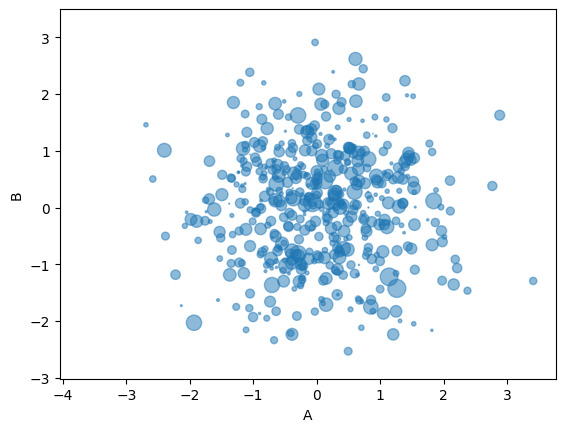

In [15]:
#size
df1.plot.scatter(x='A',y='B',s=df1['C']*50, alpha=0.5);

The warning above appeared because some `df1['C']` values are negative. We can fix this finding the minimum value, writing a function that adds to each value, and applying our function to the data with <strong>.apply(func)</strong>.

Also, these data points have a lot of overlap. We can address this issue by passing in an <strong>alpha</strong> blending value between 0 and 1 to make markers more transparent.

In [23]:
df1['C'].min()

-2.987971138961773

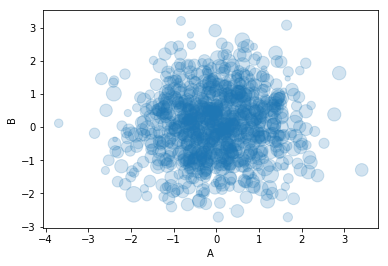

In [24]:
def add_three(val):
    return val+3

df1.plot.scatter(x='A',y='B',s=df1['C'].apply(add_three)*45, alpha=0.2);

Let's see what this looks like with our smaller dataset. Here we'll also apply .autoscale() to tighten the axes.

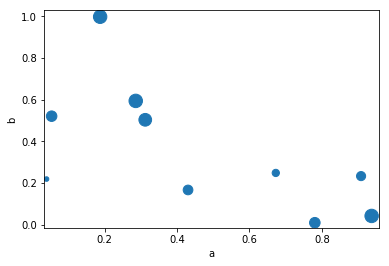

In [25]:
df2.plot.scatter(x='a',y='b',s=df2['c']*200).autoscale(enable=True, axis='both', tight=True);

## BoxPlots
Box plots, aka "box and whisker diagrams", describe the distribution of data by dividing data into <em>quartiles</em> about the mean.<br>
Look <a href='https://en.wikipedia.org/wiki/Box_plot'>here</a> for a description of boxplots. <a href='https://pandas.pydata.org/pandas-docs/stable/visualization.html#box-plots'>[reference]</a>

<div class="alert alert-danger"><strong>NOTE:</strong> At this time we recommend using <tt><font color=black>df.boxplot()</font></tt> instead of <tt><font color=black>df.plot.box()</font></tt> as certain operations such as groupby currently do not work properly in <tt>df.plot.box()</tt>. For more information visit <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html'>https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html</a></div></div>

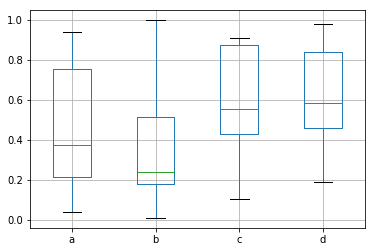

In [26]:
df2.boxplot();

### Boxplots with Groupby
To draw boxplots based on groups, first pass in a list of columns you want plotted (including the groupby column), then pass <strong>by='columname'</strong> into <tt>.boxplot()</tt>. Here we'll group records by the <strong>'e'</strong> column, and draw boxplots for the <strong>'b'</strong> column.

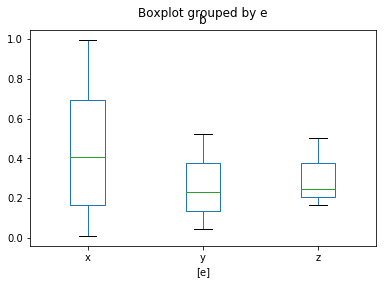

In [27]:
df2[['b','e']].boxplot(by='e', grid=False);

In the next section on Customizing Plots we'll show how to change the title and axis labels.

## Kernel Density Estimation (KDE) Plot
These plots are accessible either through <tt>df.plot.kde()</tt> or <tt>df.plot.density()</tt> <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.kde.html'>[reference]</a>

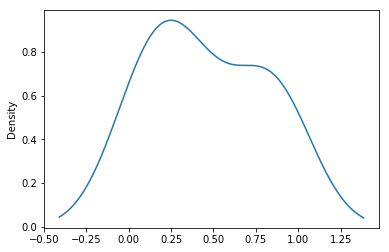

In [28]:
df2['a'].plot.kde();

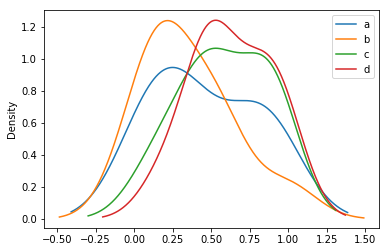

In [29]:
df2.plot.density();

## Hexagonal Bin Plot

Useful for Bivariate Data, alternative to scatterplot. <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.hexbin.html'>[reference]</a>

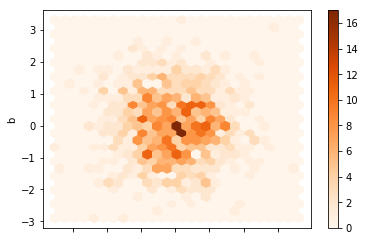

In [30]:
# FIRST CREATE A DATAFRAME OF RANDOM VALUES
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])

# MAKE A HEXAGONAL BIN PLOT
df.plot.hexbin(x='a',y='b',gridsize=25,cmap='Oranges');

That's it! If you're familiar with matplotlib, hopefully you can see why this method of plotting will be a lot easier to use. Plus, a lot of the plot calls accept the same additional arguments as their parent matplotlib <tt>plt.</tt> call. 


# Great Job!